In [1]:
import pandas as pd
import json
import seaborn as sns
import pandas as pd
import json
import matplotlib.pyplot as plt

# All timing are in micro seconds (us) 

In [2]:
df = pd.read_csv("./results/oob/mm_oob_fr.csv")
df_avg = pd.read_csv("./results/oob/mm_oob_avg.csv")
pd.options.display.max_rows = 999
confs = list(df['conf'].values)
unq_m = df['m'].unique()
n_confs = int(df.shape[0] / len(unq_m))
time_cols = ["conversion_in0",	"conversion_in1",	"transfer_in0",	"transfer_in1",	"tilization_in0",	"tilization_in1",	"first_run", "second_run", "compile_time", "inference_avg"]
for col in time_cols:
    if col in df.columns:
        df[col] = df[col].values * 1e6
    if col in df_avg.columns:
        df_avg[col] = df_avg[col].values * 1e6
df

,conf,m,grid_size,in0_storage_type,in1_storage_type,out_storage_type,dtype,math_fidelity,conversion_in0,conversion_in1,transfer_in0,transfer_in1,tilization_in0,tilization_in1,first_run,second_run,compile_time
0,f16_m4,256,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,675.053596,307.075977,362.796783,212.779045,303144.228458,289.502144,590911.643505,378.108025,590533.535480
1,f16_m4,512,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,8214.960098,315.864086,1194.291115,374.355316,290765.852928,296.885967,596449.098587,376.193523,596072.905064
2,f16_m4,1024,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,6178.357601,308.692455,1640.901566,970.871449,283801.462650,376.603603,593151.571751,523.178577,592628.393173
3,f16_m4,2048,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,447.249413,313.267708,3625.919819,3460.280895,287045.400143,709.834099,606579.174995,1201.982498,605377.192497
4,f16_m4,3072,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,425.815582,317.387581,7647.809982,7556.674480,281286.759377,1390.650272,604621.257782,2507.727146,602113.530636
5,f16_m4,4096,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,521.719456,316.474438,13310.384750,13242.559433,282910.830975,2105.545998,611702.067852,4798.047543,606904.020309
6,f16_m2,256,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,1054.768562,324.029922,572.929382,227.813721,324730.963707,311.937332,638508.136272,389.828682,638118.307590
7,f16_m2,512,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,7784.740925,335.245132,1328.799725,382.792950,307526.559830,307.252407,637756.962776,378.787518,637378.175259
8,f16_m2,1024,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,4596.018791,342.650414,2256.174088,1007.380486,302348.895073,385.391712,641580.939293,540.494919,641040.444374
9,f16_m2,2048,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,884.490013,325.555801,3824.203014,3489.160538,303126.473427,717.349052,655895.271301,1267.437935,654627.833366


In [3]:
conf_infos = dict()
infs = ['in0_storage_type',
       'in1_storage_type', 'out_storage_type', 'dtype', 'math_fidelity',]
for conf in confs:
    conf_infos[conf] = dict()
    val0 = df.loc[df['conf'] == conf]
    for inf in infs:
        conf_infos[conf][inf] = val0[inf].values[0]
conf_infos

{'f16_m4': {'in0_storage_type': 'DRAM',
  'in1_storage_type': 'DRAM',
  'out_storage_type': 'DRAM',
  'dtype': 'DataType.BFLOAT16',
  'math_fidelity': 'MathFidelity.HiFi4'},
 'f16_m2': {'in0_storage_type': 'DRAM',
  'in1_storage_type': 'DRAM',
  'out_storage_type': 'DRAM',
  'dtype': 'DataType.BFLOAT16',
  'math_fidelity': 'MathFidelity.HiFi2'}}

In [4]:
def get_column_df_info(df_inf, d_name, c_name = 'conf', mean=False):
    data = dict()
    c_list = df_inf[c_name].unique()

    for c in c_list:
        data[c] = list()

        for m in unq_m:
            val0 = df_inf.loc[(df_inf['m'] == m) & (df_inf[c_name] == c)][d_name].values
            if mean:
                val0 = val0.mean()
            else:
                val0 = val0[0]
            data[c].append(val0)

    df_c = pd.DataFrame.from_dict(data)
    df_c.set_index(unq_m, inplace=True)
    return df_c

## Data movement

In [12]:
df_conversion0_fr = get_column_df_info(df, 'conversion_in0', mean=True) 
df_conversion1_fr = get_column_df_info(df, 'conversion_in1', mean=True)
df_transf0_fr = get_column_df_info(df, 'transfer_in0', mean=True) 
df_transf1_fr = get_column_df_info(df, 'transfer_in1', mean=True)
df_tilization0_fr = get_column_df_info(df, 'tilization_in0', mean=True) 
df_tilization1_fr = get_column_df_info(df, 'tilization_in1', mean=True)
df_compile = get_column_df_info(df, 'compile_time')
df_data_mv_fr = df_conversion0_fr + df_conversion1_fr + df_transf0_fr + df_transf1_fr + df_tilization0_fr + df_tilization0_fr
df_data_mv_fr


,f16_m4,f16_m2
256,607846.162319,651641.469002
512,591631.176472,624884.698391
1024,576701.748371,612900.013924
2048,581937.518120,614776.356220
3072,578521.206379,613089.742661
4096,593212.800026,626191.411018


In [11]:
df_conversion0_avg = get_column_df_info(df_avg, 'conversion_in0', mean=True) 
df_conversion1_avg = get_column_df_info(df_avg, 'conversion_in1', mean=True)
df_transf0_avg = get_column_df_info(df_avg, 'transfer_in0', mean=True) 
df_transf1_avg = get_column_df_info(df_avg, 'transfer_in1', mean=True)
df_tilization0_avg = get_column_df_info(df_avg, 'tilization_in0', mean=True) 
df_tilization1_avg = get_column_df_info(df_avg, 'tilization_in1', mean=True)
df_data_mv_avg = df_conversion0_avg + df_conversion1_avg + df_transf0_avg + df_transf1_avg + df_tilization0_avg + df_tilization0_avg
df_data_mv_avg

,f16_m2,f16_m4
256,2524.879076,2281.003296
512,2843.456929,2416.928923
1024,3471.507124,3540.593001
2048,8982.145269,9201.764140
3072,23742.804947,19493.447291
4096,34719.960051,32968.251211


## Inference

In [15]:
df_sr = get_column_df_info(df, "second_run")
df_sr

,f16_m4,f16_m2
256,378.108025,389.828682
512,376.193523,378.787518
1024,523.178577,540.494919
2048,1201.982498,1267.437935
3072,2507.727146,2617.120743
4096,4798.047543,4820.868969


In [19]:
df_inf_avg = get_column_df_info(df_avg, 'inference_avg')
df_inf_avg

,f16_m2,f16_m4
256,324.045452,333.309499
512,358.096740,329.552619
1024,497.144578,500.449667
2048,1174.391553,1177.879151
3072,2578.712808,2505.932025
4096,4792.118637,4775.388861


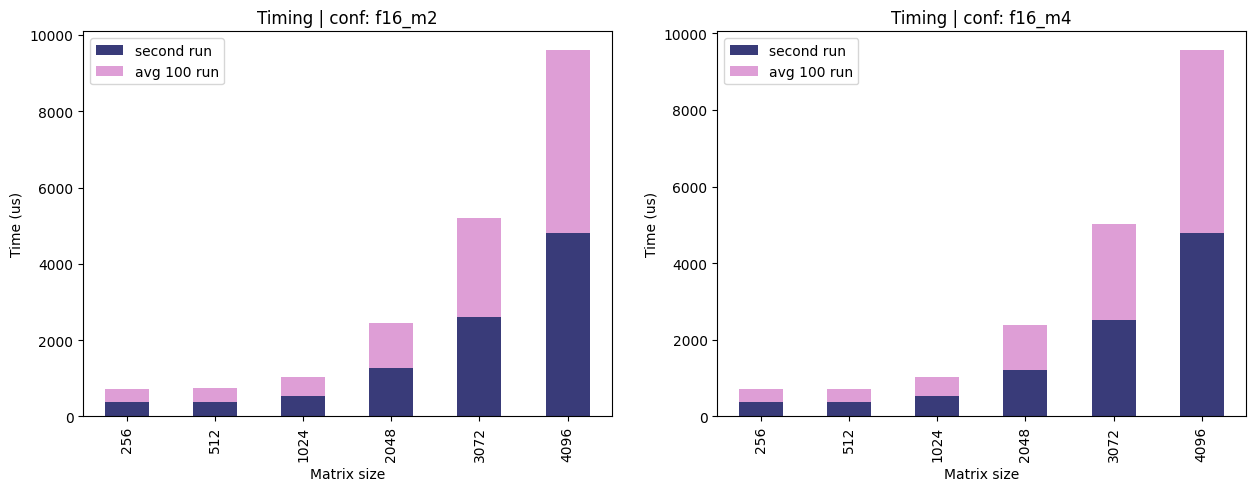

In [99]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
i, j = 0, 0
for conf in df_inf_avg.columns:
    df_combined = pd.concat([df_sr[conf], df_inf_avg[conf]], axis=1)
    df_combined.columns = ["second run", "avg 100 run"]
    df_combined

    # Create a stacked bar plot
    plot = df_combined.plot(kind='bar', stacked=True, ax=axs[j], colormap="tab20b")
    if j < 2:
        j+=1
    else:
        j = 0
        i +=1

    plot.set_title(f'Timing | conf: {conf}')
    plot.set_xlabel('Matrix size')
    plot.set_ylabel('Time (us)')
plt.show()

In [ ]:
pandas.set

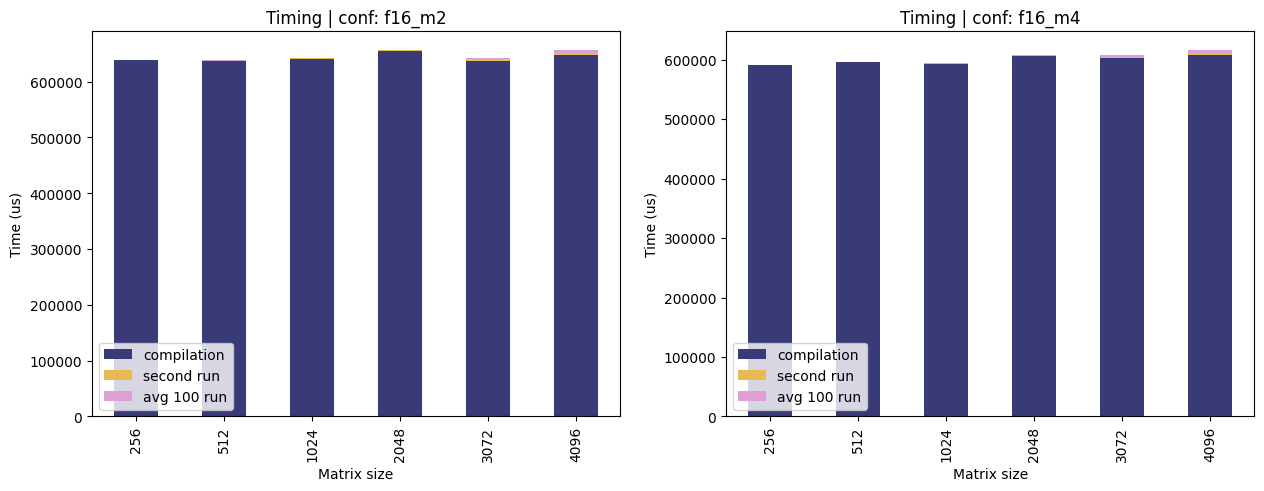

In [94]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
i, j = 0, 0
for conf in df_inf_avg.columns:
    df_combined = pd.concat([df_compile[conf], df_sr[conf], df_inf_avg[conf]], axis=1)
    df_combined.columns = ["compilation", "second run", "avg 100 run"]
    df_combined

    # Create a stacked bar plot
    plot = df_combined.plot(kind='bar', stacked=True, ax=axs[j], colormap="tab20b")
    
    if j < 2:
        j+=1
    else:
        j = 0
        i +=1

    plot.set_title(f'Timing | conf: {conf}')
    plot.set_xlabel('Matrix size')
    plot.set_ylabel('Time (us)')
plt.show()

### Torch comparison 

#### Torch bf16

In [25]:
df_torch = pd.concat([
    # too slow: pd.read_csv("./results/torch_bfp16.csv", index_col="m"), 
    pd.read_csv("./results/torch_fp32.csv", index_col="m"),
    pd.read_csv("./results/torch_bfp16_gmtg.csv", index_col="m"),
    pd.read_csv("./results/torch_fp32_gmtg.csv", index_col="m")], axis=1)
df_compare_conf_torch = pd.concat([df_inf_avg, df_torch], axis=1)
df_compare_conf_torch

,f16_m2,f16_m4,torch_fp32,torch_bfp16_gmtg,torch_fp32_gmtg
256,324.045452,333.309499,8.206129e+01,94.101429,121.059418
512,358.096740,329.552619,4.992867e+02,94.506741,311.038494
1024,497.144578,500.449667,3.081963e+03,146.510601,875.525475
2048,1174.391553,1177.879151,2.506427e+04,1475.477219,1716.034412
3072,2578.712808,2505.932025,8.344136e+04,2452.740669,7719.821930
4096,4792.118637,4775.388861,2.274305e+05,6673.305035,16620.409489
8192,NaN,NaN,1.653865e+06,42056.601048,116032.037735


CPU Torch fp16 is out of scale (working single core)

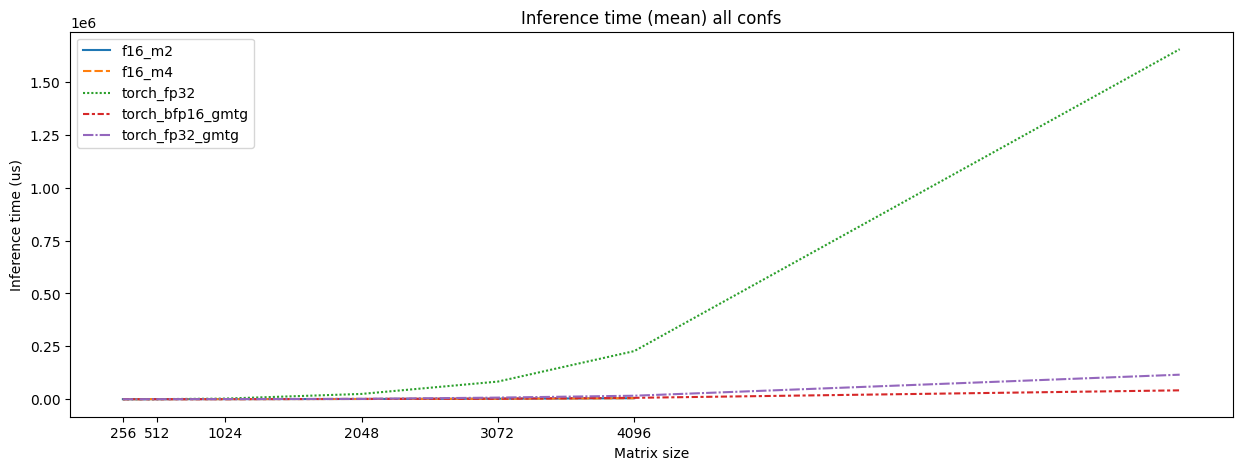

In [26]:
fig, ax = plt.subplots(figsize=(15,5))

plot = sns.lineplot(df_compare_conf_torch, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Inference time (us)")
plot.set_title("Inference time (mean) all confs")

plt.show()

Smaller window and ignore fp16

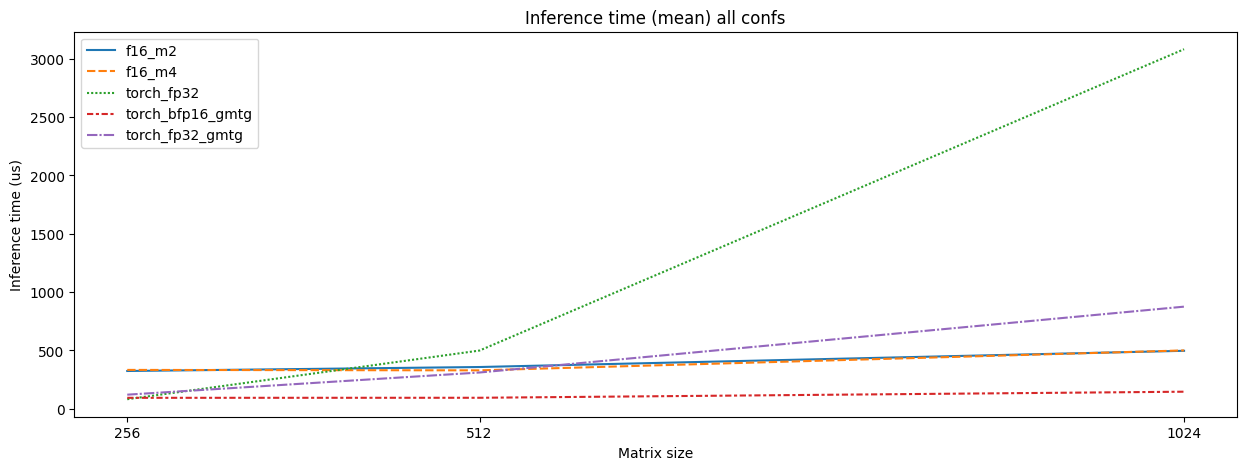

In [101]:
fig, ax = plt.subplots(figsize=(15,5))
window = 3

plot = sns.lineplot(df_compare_conf_torch.iloc[:window], ax=ax)
plot.set_xticks(unq_m[:window])
plot.set_xlabel("Matrix size")
plot.set_ylabel("Inference time (us)")
plot.set_title("Inference time (mean) all confs")

plt.show()

##### Torch comparison including transfer time

In [28]:
df_compare_conf_torch_tot = pd.concat([df_transf0_avg + df_transf1_avg + df_inf_avg, df_torch], axis=1)
df_compare_conf_torch_tot

,f16_m2,f16_m4,torch_fp32,torch_bfp16_gmtg,torch_fp32_gmtg
256,939.170665,1092.829285,8.206129e+01,94.101429,121.059418
512,1596.290029,1489.020215,4.992867e+02,94.506741,311.038494
1024,2459.157211,2510.250054,3.081963e+03,146.510601,875.525475
2048,8144.059413,8312.763871,2.506427e+04,1475.477219,1716.034412
3072,18498.968265,17936.278378,8.344136e+04,2452.740669,7719.821930
4096,32514.583177,32217.522475,2.274305e+05,6673.305035,16620.409489
8192,NaN,NaN,1.653865e+06,42056.601048,116032.037735


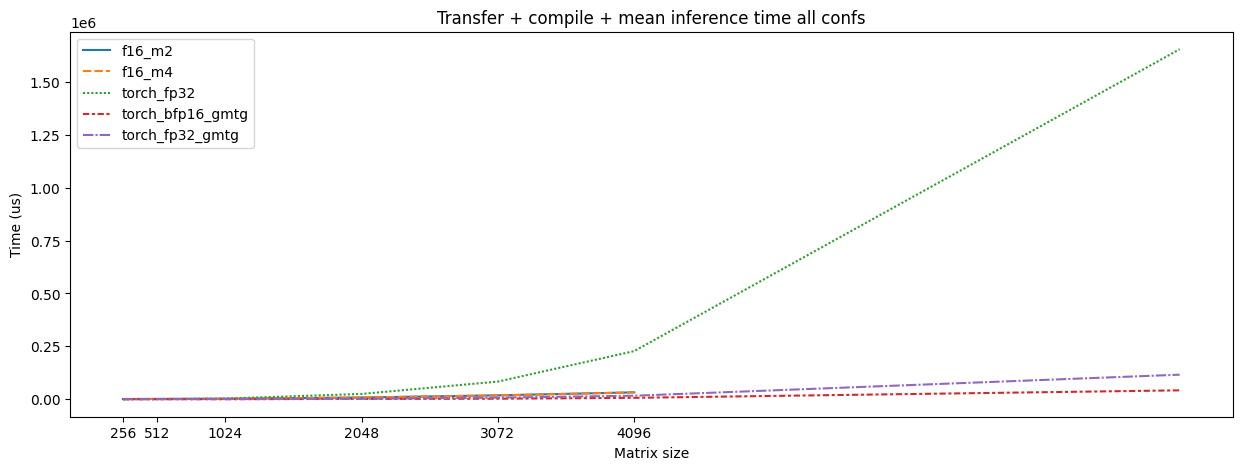

In [29]:
fig, ax = plt.subplots(figsize=(15,5))

plot = sns.lineplot(df_compare_conf_torch_tot, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time (us)")
plot.set_title("Transfer + compile + mean inference time all confs")

plt.show()

Smaller window. A single matmul is always faster on CPU (torch_32) due to the overhead

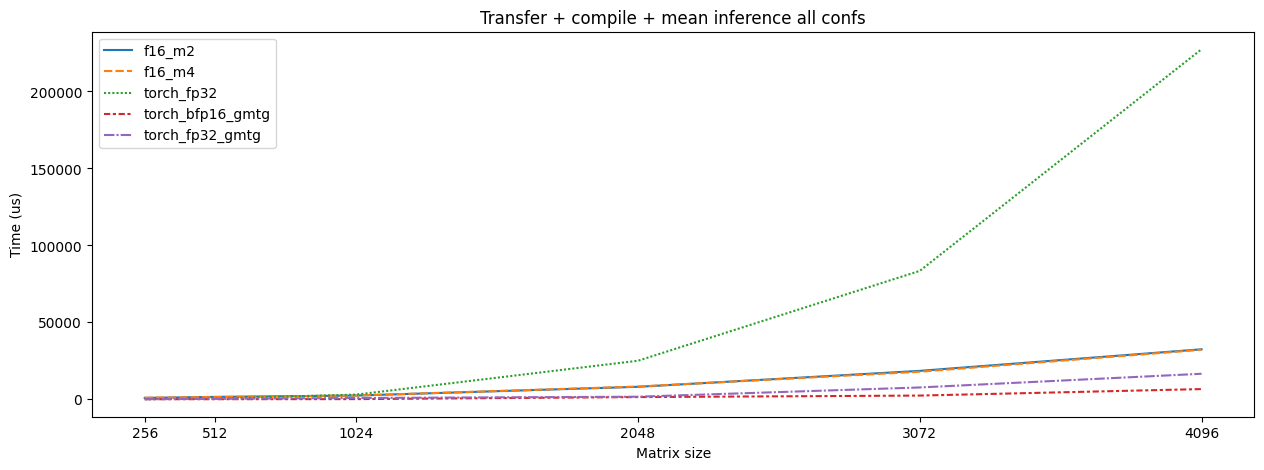

In [30]:
fig, ax = plt.subplots(figsize=(15,5))

window = 6
plot = sns.lineplot(df_compare_conf_torch_tot.iloc[:window], ax=ax)
plot.set_xticks(unq_m[:window])
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time (us)")
plot.set_title("Transfer + compile + mean inference all confs")

plt.show()

## First run vs subsequent run comparison

In [62]:
df_first_round = pd.DataFrame()
conf = 'f16_m4'
df_first_round['conversion_in0'] = df_conversion0_fr[conf]
df_first_round['conversion_in1'] = df_conversion1_fr[conf]
df_first_round['transfer_in0'] = df_transf0_fr[conf]
df_first_round['transfer_in1'] = df_transf1_fr[conf]
df_first_round['tilization_in0'] = df_tilization0_fr[conf]
df_first_round['tilization_in1'] = df_tilization1_fr[conf]
df_first_round['run'] = get_column_df_info(df, 'first_run')[conf]
df_first_round


,conversion_in0,conversion_in1,transfer_in0,transfer_in1,tilization_in0,tilization_in1,run
256,675.053596,307.075977,362.796783,212.779045,303144.228458,289.502144,590911.643505
512,8214.960098,315.864086,1194.291115,374.355316,290765.852928,296.885967,596449.098587
1024,6178.357601,308.692455,1640.901566,970.871449,283801.462650,376.603603,593151.571751
2048,447.249413,313.267708,3625.919819,3460.280895,287045.400143,709.834099,606579.174995
3072,425.815582,317.387581,7647.809982,7556.674480,281286.759377,1390.650272,604621.257782
4096,521.719456,316.474438,13310.384750,13242.559433,282910.830975,2105.545998,611702.067852


In [63]:
df_n_round = pd.DataFrame()
conf = 'f16_m4' # the n runned!
df_n_round['conversion_in0'] = df_conversion0_avg[conf]
df_n_round['conversion_in1'] = df_conversion1_avg[conf]
df_n_round['transfer_in0'] = df_transf0_avg[conf]
df_n_round['transfer_in1'] = df_transf1_avg[conf]
df_n_round['tilization_in0'] = df_tilization0_avg[conf]
df_n_round['tilization_in1'] = df_tilization1_avg[conf]
df_n_round['run'] = df_inf_avg[conf]
df_n_round

,conversion_in0,conversion_in1,transfer_in0,transfer_in1,tilization_in0,tilization_in1,run
256,255.281120,210.975584,319.831279,439.688506,527.613403,249.401610,333.309499
512,434.234238,224.204765,782.775527,376.692069,299.511163,259.727877,329.552619
1024,516.316762,246.590554,1035.296214,974.504174,383.942649,354.160985,500.449667
2048,406.473084,225.625016,3658.072552,3476.812168,717.390660,708.434984,1177.879151
3072,572.661895,312.938007,7809.375718,7620.970634,1588.750518,1422.838340,2505.932025
4096,615.406220,408.820736,13835.226079,13606.907535,2250.945320,2195.783314,4775.388861


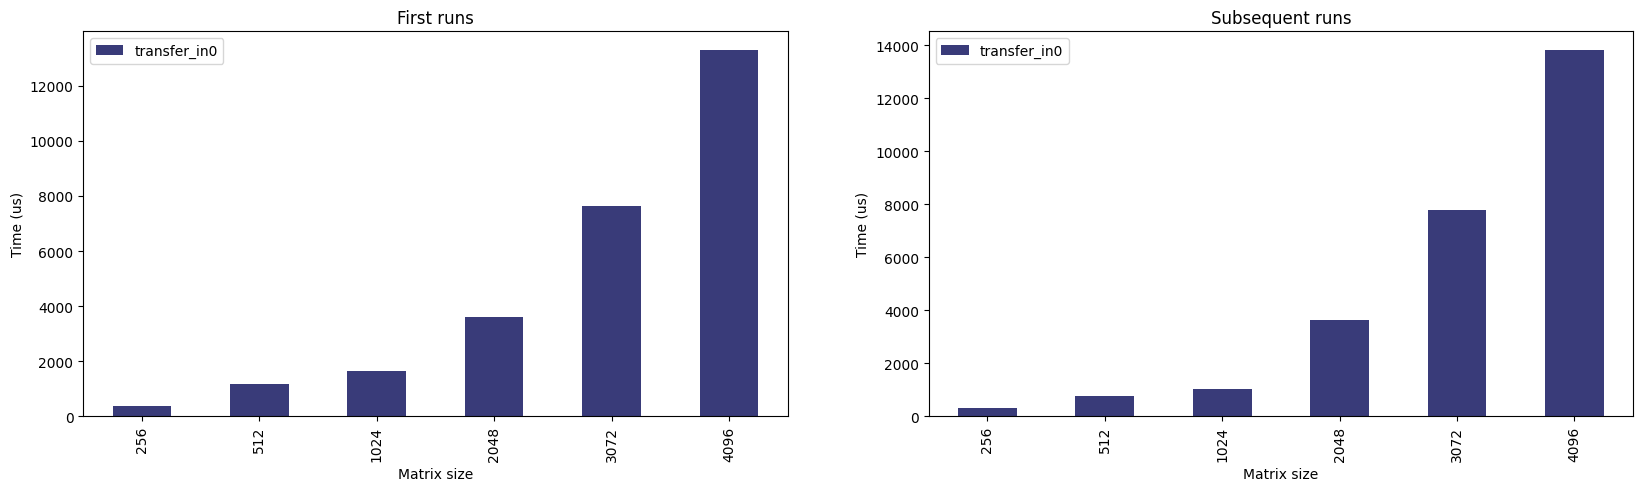

In [127]:
cols = ["transfer_in0"]

fig, axs = plt.subplots(1,2, figsize=(20,5))

plot_fr = df_first_round[cols].plot(kind='bar', stacked=True, use_index=True, ax=axs[0], colormap="tab20b")
plot_fr.set_title(f'First runs')
plot_fr.set_xlabel('Matrix size')
plot_fr.set_ylabel('Time (us)')

plot = df_n_round[cols].plot(kind='bar', stacked=True, use_index=True, ax=axs[1], colormap="tab20b")
plot.set_title(f'Subsequent runs')
plot.set_yticks(plot_fr.get_yticks())
plot.set_xlabel('Matrix size')
plot.set_ylabel('Time (us)')
plt.show()

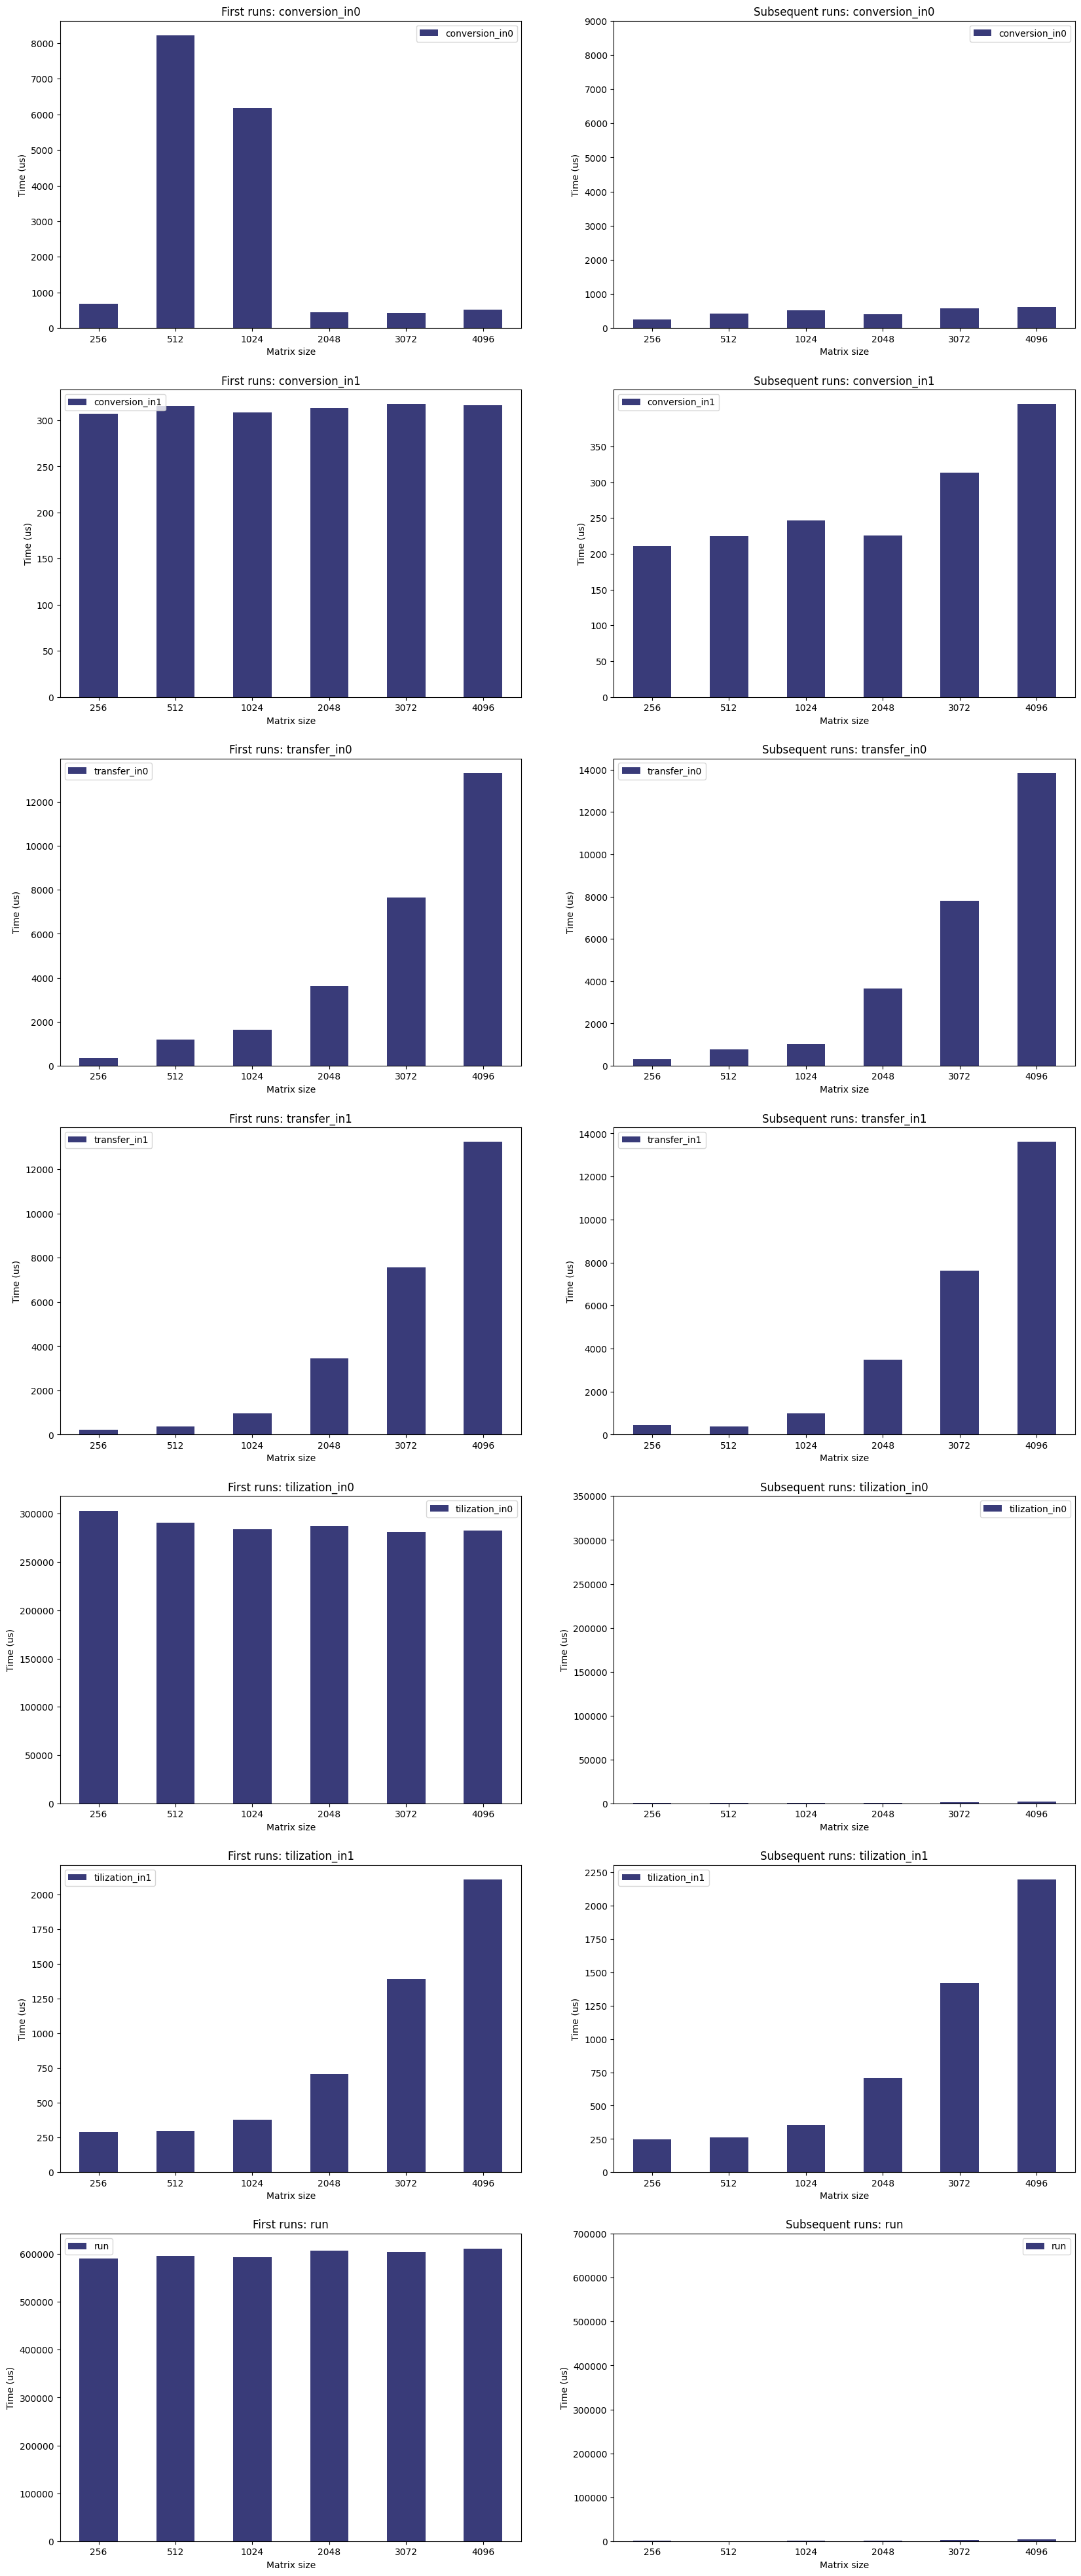

In [123]:
cols = ["transfer_in0"]

fig, axs = plt.subplots(len(df_first_round.columns), 2, figsize=(20,50))

i = 0 
for col in df_first_round.columns:

    plot_fr = df_first_round[[col]].plot(kind='bar', stacked=True, use_index=True, ax=axs[i][0], colormap="tab20b", rot=0)
    plot_fr.set_title(f'First runs: {col}')
    plot_fr.set_xlabel('Matrix size')
    plot_fr.set_ylabel('Time (us)')

    plot = df_n_round[[col]].plot(kind='bar', stacked=True, use_index=True, ax=axs[i][1], colormap="tab20b", rot=0)
    plot.set_title(f'Subsequent runs: {col}')
    plot.set_yticks(plot_fr.get_yticks())
    plot.set_xlabel('Matrix size')
    plot.set_ylabel('Time (us)')

    i+=1

    
plt.show()

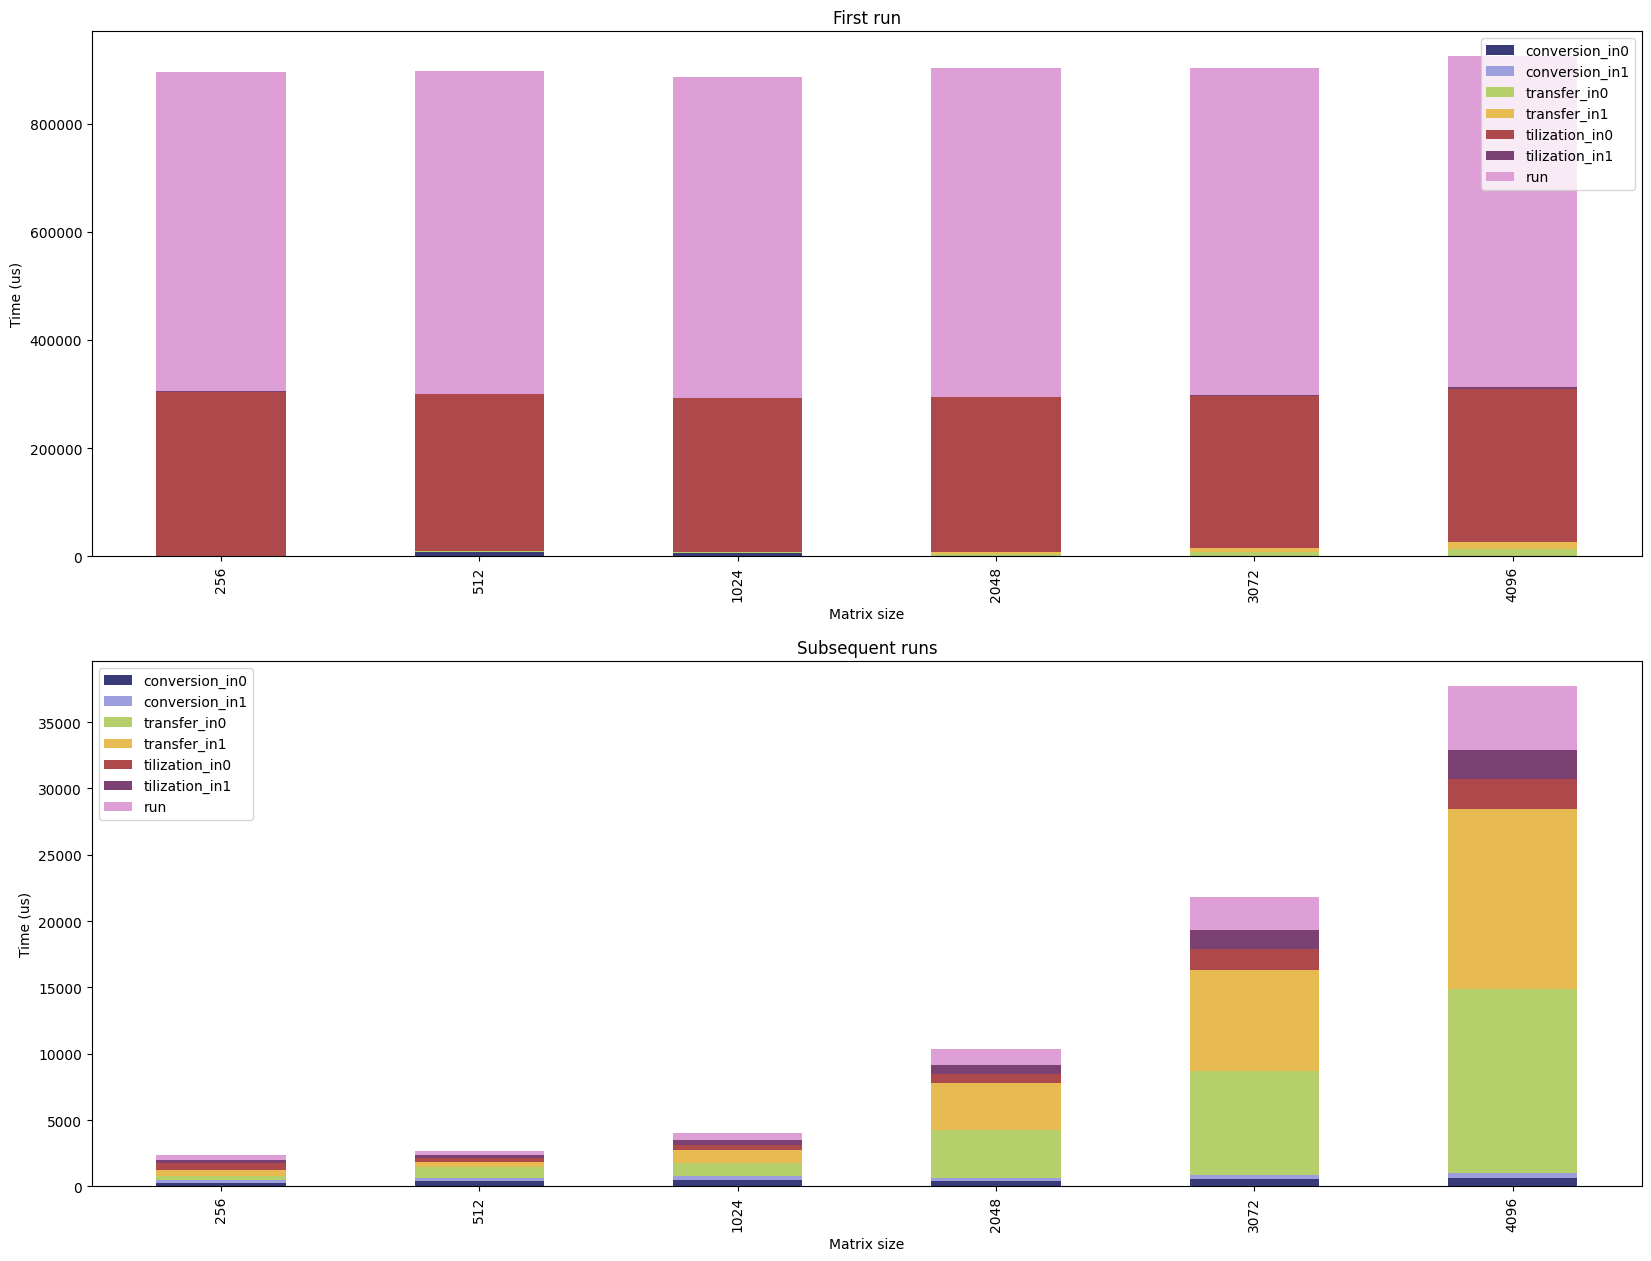

In [76]:
fig, axs = plt.subplots(2,1, figsize=(20,15))

plot = df_first_round.plot(kind='bar', stacked=True, use_index=True, ax=axs[0], colormap="tab20b")
plot.set_title(f'First run')
plot.set_xlabel('Matrix size')
plot.set_ylabel('Time (us)')

plot = df_n_round.plot(kind='bar', stacked=True, use_index=True, ax=axs[1], colormap="tab20b")
plot.set_title(f'Subsequent runs')
plot.set_xlabel('Matrix size')
plot.set_ylabel('Time (us)')
plt.show()

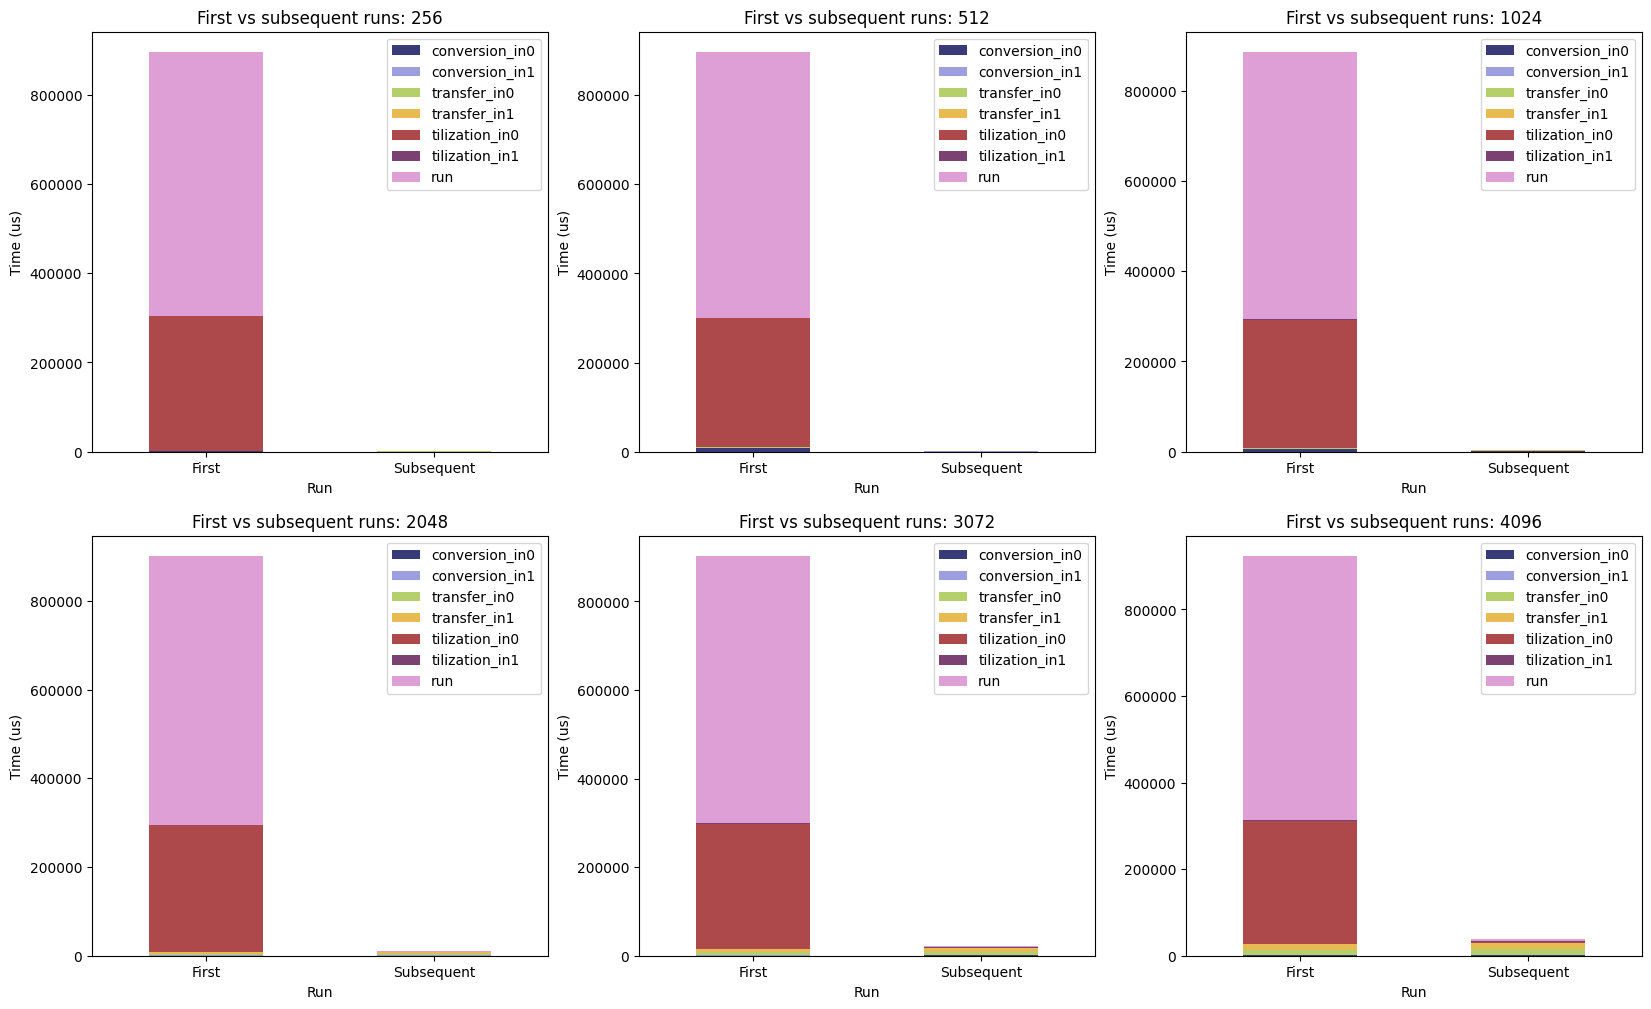

In [70]:
fig, axs = plt.subplots(2,3, figsize=(20,12))
i, j = 0, 0
for m in unq_m:
    # Create a stacked bar plot
    df_combined = pd.concat([df_first_round.loc[[m]], df_n_round.loc[[m]]])
    plot = df_combined.plot(kind='bar', stacked=True, use_index=True, ax=axs[i][j], colormap="tab20b")
    plot.set_xticklabels(["First", "Subsequent"], rotation=0)
    
    if j < 2:
        j+=1
    else:
        j = 0
        i +=1

    plot.set_title(f'First vs subsequent runs: {m}')
    plot.set_xlabel('Run')
    plot.set_ylabel('Time (us)')
plt.show()

In [66]:
df_torch_bfp16_gmtk = pd.DataFrame()
df_torch_fp32_gmtk = pd.DataFrame()
df_torch_fp32 = pd.DataFrame()
df_torch_bfp16_gmtk['run'] = pd.DataFrame(df_torch[['torch_bfp16_gmtg']])
df_torch_fp32_gmtk['run'] = df_torch[['torch_fp32_gmtg']]
df_torch_fp32['run'] = df_torch[['torch_fp32']]

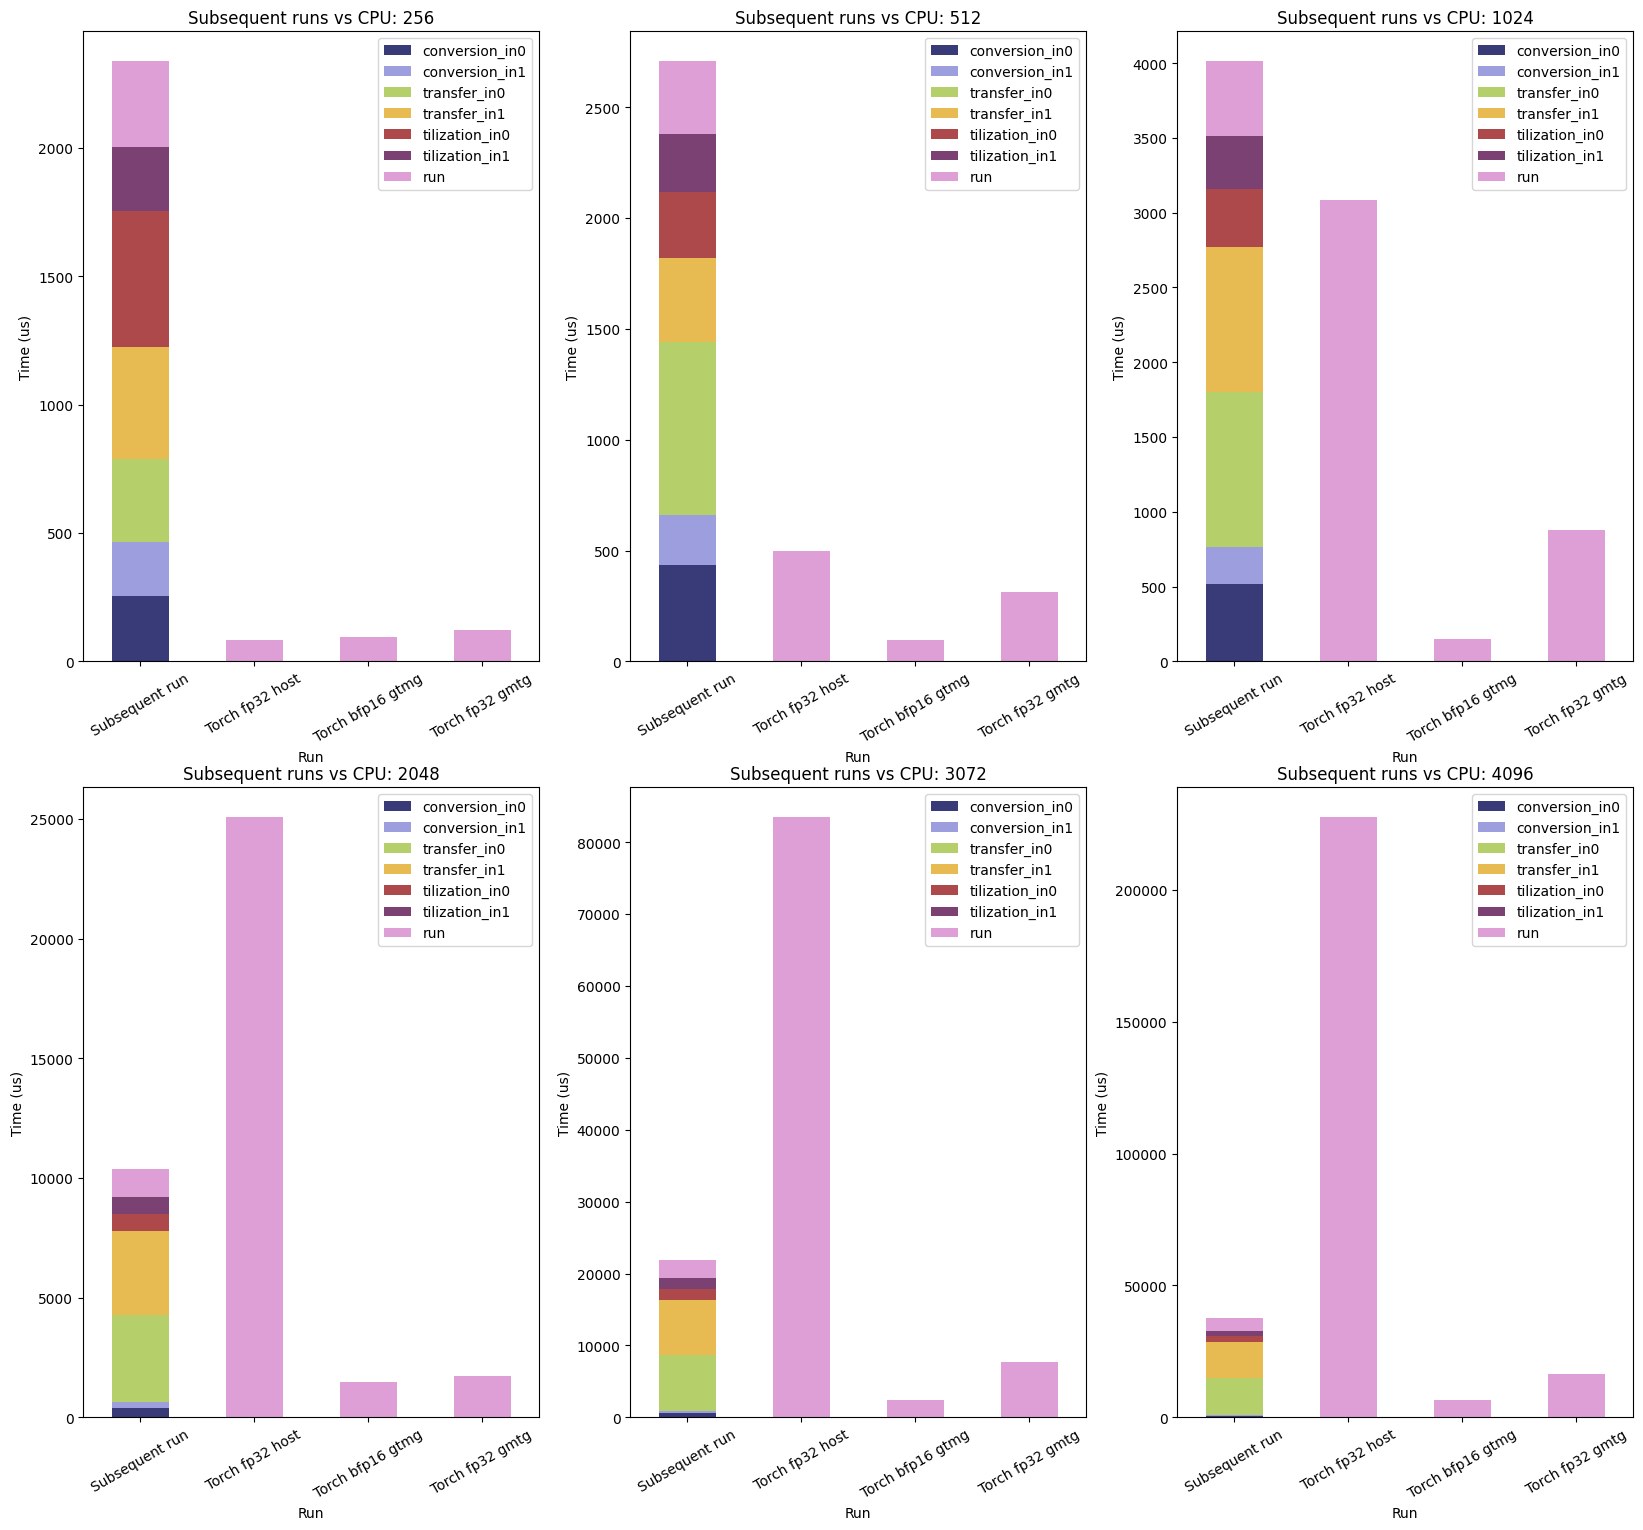

In [71]:
fig, axs = plt.subplots(2,3, figsize=(20,18))
i, j = 0, 0
for m in unq_m:
    # Create a stacked bar plot
    df_combined = pd.concat([df_n_round.loc[[m]], df_torch_fp32.loc[[m]], df_torch_bfp16_gmtk.loc[[m]], df_torch_fp32_gmtk.loc[[m]]])
    plot = df_combined.plot(kind='bar', stacked=True, use_index=True, ax=axs[i][j], colormap="tab20b")
    plot.set_xticklabels(["Subsequent run", "Torch fp32 host", "Torch bfp16 gtmg", "Torch fp32 gmtg"], rotation=30)
    
    if j < 2:
        j+=1
    else:
        j = 0
        i +=1

    plot.set_title(f'Subsequent runs vs CPU: {m}')
    plot.set_xlabel('Run')
    plot.set_ylabel('Time (us)')
plt.show()

## Acceleration vs CPU

$$
CPU_t = \mathcal{N} \text{matmul}_{CPU}\\
DM_t = \text{conversion}_t + \text{transfer}_t + \text{tilization}_t\\
\text{compilation}_t = \text{tilization}_{ct} + \text{matmul}_{ct}\\
TT_t = \text{compilation}_t + \mathcal{N}(\text{matmul}_{TT} + \text{DM}_{t}) \\
$$

To obtain $TT_t < CPU_t$, we need to size N: 

$
    \text{transfer}_t + \text{compilation}_t < \mathcal{N}(\text{matmul}_{CPU} - \text{matmul}_{TT})\\
$

$$
    \mathcal{N} > \frac{\text{transfer}_t + \text{compilation}_t}{\text{matmul}_{CPU} - \text{matmul}_{TT}}
$$

In [163]:
df_overhead = (df_transf0 + df_transf1 + df_compile)
df_overhead

,f16_m2,f16_m4
256,724481.370449,242.536068
512,598589.243889,371.091366
1024,667168.369293,755.462646
2048,727750.039101,1499.109268
3072,614183.659554,2562.654018
4096,697023.451328,3591.065407


In [164]:
df_accl = ((- df_avg).add(df_torch['torch_fp32'], axis=0))
df_accl

,f16_m2,f16_m4
256,-133.919716,-126.490593
512,295.023918,273.377895
1024,2859.270573,2854.425907
2048,24164.452553,24111.003876
3072,81209.278107,81086.390018
4096,222849.586010,222617.549896
8192,NaN,NaN


In [165]:
df_N_accl = df_overhead / df_accl
df_N_accl

,f16_m2,f16_m4
256,-5409.818604,-1.917424
512,2028.951577,1.357430
1024,233.335164,0.264664
2048,30.116554,0.062175
3072,7.562974,0.031604
4096,3.127775,0.016131
8192,NaN,NaN


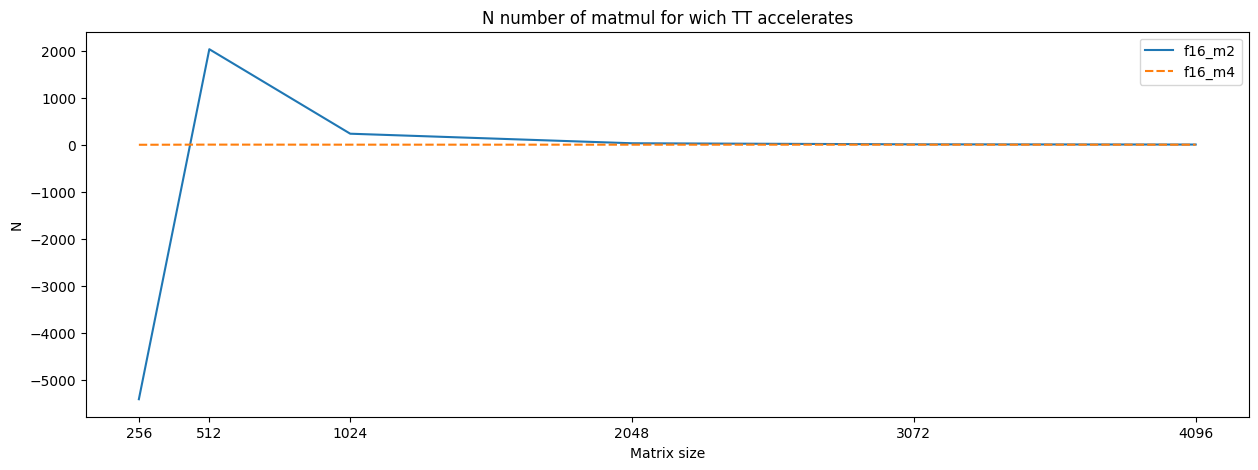

In [166]:
fig, ax = plt.subplots(figsize=(15,5))

plot = sns.lineplot(df_N_accl, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("N")
plot.set_title("N number of matmul for wich TT accelerates")

plt.show()